**this is a template notebook for Assignment 4 on Recommendation. To get a 60 you will need to complete chapter 1.
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span style ='background:yellow'>Recommendation system </span>


Author: <span style='background:yellow'>Stephen pangga</span><br>
Student number: <span style='background:yellow'>629860</span><br>
Date: <span style='background:yellow'>10/06/2022</span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* **\<add other packages\>**

From these we will need the following libraries:

In [174]:
# enter here all those 'from .... import ....'
import pandas as pd


# 1. The Item-Based Recommender

We are going to build an item-based recommender for **<span style='background:yellow'> Movies <YOUR INPUT></span>**. In this recommender we could for example **<span style='background:yellow'>\<give a brief description of an example how your recommender would work></span>**.

give a user a movie recommendation based on the movie show they like to watch. Based on the rating of the movie they provided we can find similar movie that they might like based on the similarities of the rating the of the show.


The data set source: https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system

To begin we'll need to load some data.


In [175]:
# enter code to load your example data file(s)userId,movieId,rating,timestamp
rating_df = pd.read_csv('ratings_small.csv', sep=',', names=['userId', 'movieId', 'rating', 'timestamp'])
rating_df.dropna()
rating_df.head()


,userId,movieId,rating,timestamp
0,userId,movieId,rating,timestamp
1,1,31,2.5,1260759144
2,1,1029,3.0,1260759179
3,1,1061,3.0,1260759182
4,1,1129,2.0,1260759185


**<span style='background:yellow'>\<explain a bit about the data file(s), if you have multiple and need to merge them, use the code cell below></span>**


For this Assignment we are using 2 datasets, one is the the rating of different users to a movie data sets where the movie informations can be found.

Since there are 2 data sets, we will have to merge them in order to see the rating of the movies.


In [176]:
# Optional depending on your dataset, enter code to select appropriate columns, and merge the files.
movie_dataset = pd.read_csv('movies_metadata.csv', sep=',')
movie_dataset.dropna()
movie_dataset.head()


C:\Users\steph\AppData\Local\Temp\ipykernel_17020\1167851756.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_dataset = pd.read_csv('movies_metadata.csv', sep=',')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [177]:
#create a new dataframe focusing on movieId and movie name
movieName_df = pd.DataFrame()
movieName_df['movieId'] = movie_dataset['id']
# movieName_df.columns=['movieId']
movieName_df['movieName'] = movie_dataset['title']

# movieName_df['movieId']
movieName_df.head()


,movieId,movieName
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [178]:
#merge the rating and movie table
merge_df = pd.merge(rating_df, movieName_df, on='movieId')
merge_df.dropna()
merge_df.head()

,userId,movieId,rating,timestamp,movieName
0,1,1371,2.5,1260759135,Rocky III
1,4,1371,4.0,949810302,Rocky III
2,7,1371,3.0,851869160,Rocky III
3,19,1371,4.0,855193404,Rocky III
4,21,1371,3.0,853852263,Rocky III


We need one row per user, and his/her scores for each **<span style='background:yellow'>Movie Name<YOUR OBJECT></span>**. We can do this by creating a pivot table.

In [179]:
# issues with making a pivot due to rating value not being cable
merge_df['rating'] = pd.to_numeric(merge_df['rating'], errors='coerce', downcast='integer')

# code to create pivot table

rating_matrix = merge_df.pivot_table(index='userId', columns='movieName', values='rating')
rating_matrix.head()

movieName,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN


We also need to take the counts into consideration so lets keep those into their own dataframe, together with the average score:

In [180]:
# code to make a dataframe with the unique objects, their average score and the number of scores
watchCount  = pd.DataFrame(merge_df.groupby('movieName')['rating'].mean())
watchCount['number_of_watcher'] = merge_df.groupby('movieName')['rating'].count()
watchCount.head() 

,rating,number_of_watcher
movieName,,
!Women Art Revolution,3.25,2
'Gator Bait,0.50,1
'Twas the Night Before Christmas,4.00,2
...And God Created Woman,4.00,1
00 Schneider - Jagd auf Nihil Baxter,4.00,2


To decide on a cut-off point as minimum number of scores to be eligable we can plot the number of scores in a histogram:

<AxesSubplot:>

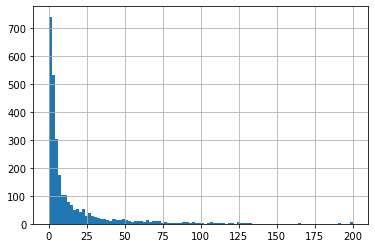

In [181]:
# code to generate the histogram
watchCount['number_of_watcher'].hist(bins=100, range=(0,200))

<AxesSubplot:>

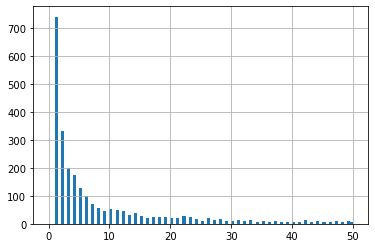

In [182]:
#the previous histogram is quite hard to see so, lets make it have a smaller range to select a cut off value.
watchCount['number_of_watcher'].hist(bins=100, range=(0,50))

From the histogram we can see that **<span style='background:yellow'>\<Explain in your own words what you notice and what you decide on as the cut-off point, explain why></span>**


The graph represent the amount of watcher versus the movies. We have looked at the first 50 of the graph, to see the amount of counts of watchers. Looking at the graph, we can see that at some point there are barely any  movies that have been seen by a lot of people and we dont want to recommend users movies that is not popular. Having this in mind, we decided to not consider movies that has less than 60 watchers.

Finally we can create the code to perform a recommendation. First we can select one particular **<span style='background:yellow'>movie called "'Twas the Night Before Christmas"'<YOUR OBJECT></span>**

In [183]:
movieName_df[movieName_df['movieName'] == "'Twas the Night Before Christmas"]

,movieId,movieName
20697,26547,'Twas the Night Before Christmas


In [184]:
# code to select one field
myShow = rating_matrix["'Twas the Night Before Christmas"]

And then to find the recommendation based on the correlations.

In [185]:
# code to create the recommendation
correlation = rating_matrix.corrwith(myShow).sort_values(ascending=False)

correlation_df = pd.DataFrame(correlation,columns=['Correlation'])
correlation_df.dropna(inplace=True)
correlation_df.sort_values('Correlation', ascending=False)
correlation_df.head()

c:\Users\steph\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\steph\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
movieName,
The Bourne Supremacy,1.0
Anatomy of Hell,1.0
Light of Day,1.0
Say Anything...,1.0
5 Card Stud,1.0


**<span style='background:yellow'>\<interpret the result></span>**

Looking at the result, we can see a list of the first five movies that is correlated to the movie 'Twas the Night Before Christmas. The watcher can now also watch this show and see how similar they are to the movie they liked.


It might be nice to have one simple function that could do all the work for us. It should have as input parameter a field and then returns the recommendation:

In [186]:
# code for a python function
def movie_recommendation(movieName):
    the_movie = rating_matrix[movieName]
    correlation = rating_matrix.corrwith(the_movie).sort_values(ascending=False)
    correlation_df = pd.DataFrame(correlation,columns=['Correlation'])
    correlation_df.dropna(inplace=True)
    correlation_df.sort_values('Correlation', ascending=False)
    correlation_df = correlation_df.merge(watchCount['number_of_watcher'], on='movieName')
    print(correlation_df[correlation_df['number_of_watcher']>=60][0:10])

Lets test the function:

In [187]:
# code to test the function
movie_recommendation("'Twas the Night Before Christmas")

c:\Users\steph\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\steph\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                             Correlation  number_of_watcher
movieName                                                  
The Bourne Supremacy                 1.0                106
Light of Day                         1.0                 98
Say Anything...                      1.0                191
5 Card Stud                          1.0                200
Mr. Holland's Opus                   1.0                 76
The Man with the Golden Arm          1.0                146
License to Wed                       1.0                202
Monsieur  Hulot's Holiday            1.0                124
Monsoon Wedding                      1.0                274
Mothra vs. Godzilla                  1.0                137


<font size="5"><center>-----Chapters 1 is required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However no template is available for these chapters. You will have to create it yourself.
    ----</center></font>

# 2. Negative correlations

The recommenders so far used, are looking at what if I give a high rating for this, what do you then recommend me. But how about if I give a low rating for something, what would you then recommend me?

# 3. Content Based

Add a chapter showing how a basic content based recommender might work. A starting point for this might be https://www.datacamp.com/community/tutorials/recommender-systems-python (at about 1/3 of the page it starts explaining this in the section called ‘Content based’.

# 4. User Based

Add a chapter showing how a basic user based recommender might work. A starting point for this might be https://realpython.com/build-recommendation-engine-collaborative-filtering/

# 5. Combination

Combine two or more recommendation techniques to get an even better recommendation